In [135]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from glob import glob
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

from zipfile import ZipFile


from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3

from keras.layers import LeakyReLU

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # for file editing
import shutil # for console commands


# GLOBAL VARIABLES
scale = 70
seed = 7

import matplotlib.pyplot as plt
%matplotlib inline


#         PART A


# Question 1. Import and Understand the data [12 Marks]

#   A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python. [2 Marks]
#        Hint: You can extract it Manually by losing 2 marks.
#   B. Map the images from train folder with train labels to form a DataFrame. [6 Marks]
#        Hint: Create a DataFrame with 3 columns: Name of image, Species/class/type of image & actual image..
#   C. Write a function that will select n random images and display images along with its species. [4 Marks]
#        Hint: If input for function is 5, it should print 5 random images along with its labels.

In [4]:


from zipfile import ZipFile 
  
# specifying the name of the zip file
file = "F:/UdemySmallProjects/ComputerVision/Project1/plant-seedlings-classification.zip"
  
# open the zip file in read mode

with ZipFile(file, 'r') as zip: 

    zip.printdir()   # list all the contents of the zip file
    zip.extractall() 
    print('Done!')

File Name                                             Modified             Size
plant-seedlings-classification/                2021-10-08 11:16:30            0
plant-seedlings-classification/.DS_Store       2021-10-08 11:16:36         6148
__MACOSX/plant-seedlings-classification/._.DS_Store 2021-10-08 11:16:36          120
plant-seedlings-classification/train/          2021-10-05 16:09:24            0
plant-seedlings-classification/train/Cleavers/ 2021-10-05 16:09:26            0
plant-seedlings-classification/train/.DS_Store 2021-10-06 16:30:12        10244
__MACOSX/plant-seedlings-classification/train/._.DS_Store 2021-10-06 16:30:12          120
plant-seedlings-classification/train/Sugar beet/ 2021-10-05 15:12:52            0
plant-seedlings-classification/train/Common Chickweed/ 2021-10-05 15:12:46            0
plant-seedlings-classification/train/Loose Silky-bent/ 2021-10-05 15:12:48            0
plant-seedlings-classification/train/Scentless Mayweed/ 2021-10-05 15:12:50           

Done!


In [9]:
# B. Map the images from train folder with train labels to form a DataFrame. [6 Marks]
#    Hint: Create a DataFrame with 3 columns: Name of image, Species/class/type of image & actual image..
import os
from glob import glob
import cv2

train_data_path= "./plant-seedlings-classification/train"

images = []
classes=[]
for class_folder_name in os.listdir(train_data_path):
    class_folder_path = os.path.join(train_data_path, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        images.append(image_bgr)
        classes.append(class_label)

In [10]:
print('Total Number of images are :',len(images))
print('The shape of a sample image is :',images[0].shape)

Total Number of images are : 4750
The shape of a sample image is : (196, 196, 3)


In [11]:
# Reading images and remove missing values save images in images list

images = []
classes=[]
missing=0
for class_folder_name in os.listdir(train_data_path):
    class_folder_path = os.path.join(train_data_path, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None: # if the file contain any missig value ignore it
          missing += 1
          continue
        images.append(image_bgr)
        
        classes.append(class_label)

In [12]:
# Number of all images
 
len(images)
        

4750

In [13]:
# Resizing the images 

def resize_images(img):

  img = np.array(img).astype(np.uint8)
  res = cv2.resize(img,(256,256), interpolation = cv2.INTER_CUBIC)
  return res

In [14]:
#save resized images into images.
images = [resize_images(img) for img in images]

In [15]:
images[0].shape

(256, 256, 3)

In [16]:
#finding number of images in each label

images = np.array(images)
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)
#for key,value in images_per_class.items():
   # print("number of {0} images is  -> {1}".format(key, len(value)))
  
for label in set(classes):

  print("number of {} images is  -> {}".format(
        label, 
        len(images[classes == label])))

images shape:  (4750, 256, 256, 3)
classes shape:  (4750,)
number of Scentless Mayweed images is  -> 516
number of Loose Silky-bent images is  -> 654
number of Common wheat images is  -> 221
number of Cleavers images is  -> 287
number of Black-grass images is  -> 263
number of Sugar beet images is  -> 385
number of Small-flowered Cranesbill images is  -> 496
number of Common Chickweed images is  -> 611
number of Fat Hen images is  -> 475
number of Shepherds Purse images is  -> 231
number of Maize images is  -> 221
number of Charlock images is  -> 390


Text(0.5, 0.98, 'Class Distribution of the dataset')

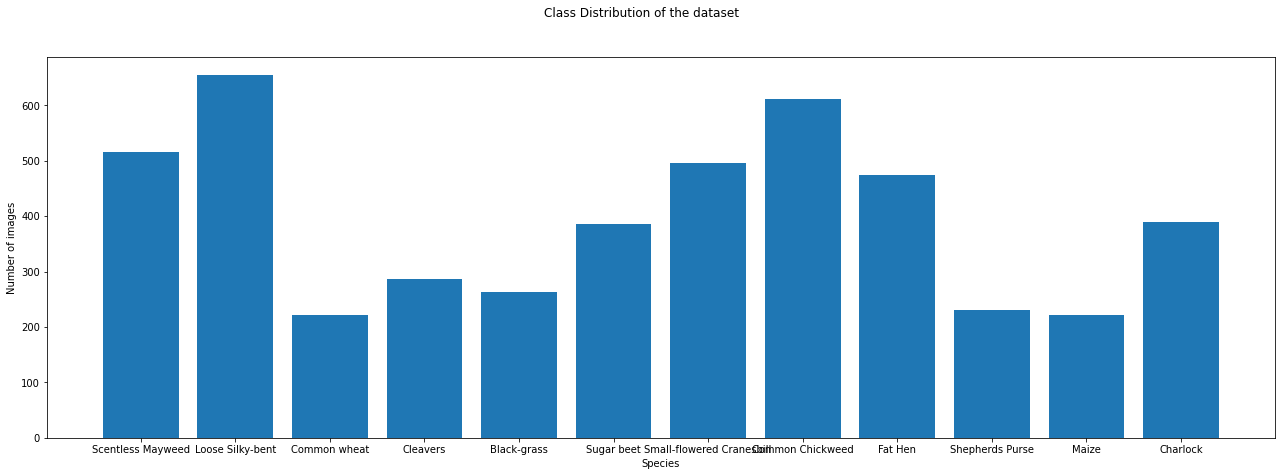

In [17]:
images = np.array(images)
classes = np.array(classes)
values =[]
labels=[]
for label in set(classes):
    values.append(len(images[classes == label]))
    labels.append(label)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values)
ax.set_xlabel("Species")
ax.set_ylabel("Number of images")
fig.suptitle('Class Distribution of the dataset')

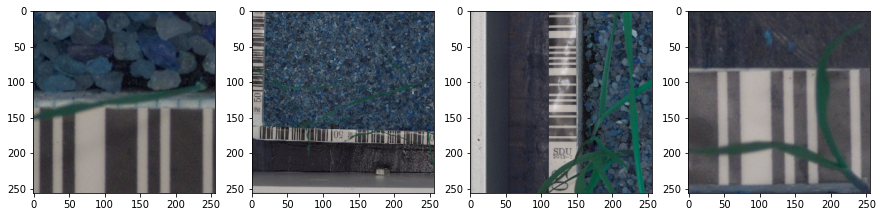

In [18]:
fig, axs = plt.subplots(1, 4, figsize=(15,15))
axs[0].imshow(images[0])
axs[1].imshow(images[10])
axs[2].imshow(images[42])
axs[3].imshow(images[65])

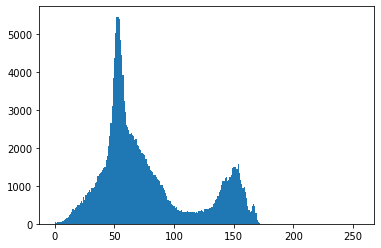

In [19]:
plt.hist(images[0].ravel(),256,[0,255])
plt.show()

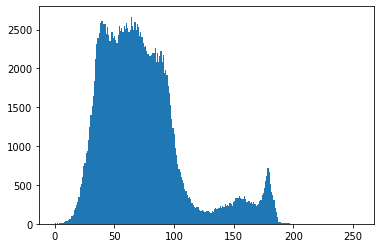

In [20]:
plt.hist(images[10].ravel(),256,[0,255])
plt.show()

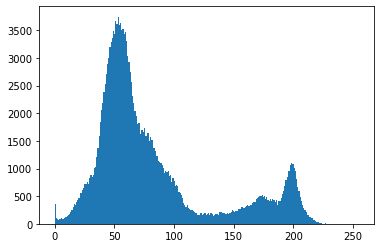

In [21]:
plt.hist(images[42].ravel(),256,[0,255])
plt.show()

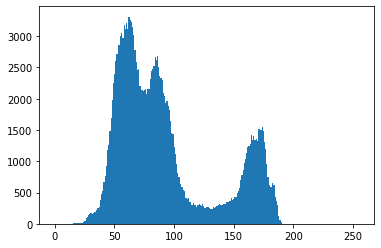

In [22]:
plt.hist(images[65].ravel(),256,[0,255])
plt.show()

From the histograms of our sample images, we can infer that:
- The intensities of the images are highly skewed towards left. That means, the images are darker.
- All the values of intensities in our images lie between the range 0-150
- Performing histogram equalization might improve the model score, even though it is not guaranteed.

In [ ]:
# C. Write a function that will select n random images and display images along with its species. [4 Marks]
#   Hint: If input for function is 5, it should print 5 random images along with its labels.


In [138]:
import random, os
path = r"./Project1/plant-seedlings-classification/train/Cleavers"
def image_random(n):
    for x in range(n):
        random_filename = random.choice([
            y for y in os.listdir(path)
            if os.path.isfile(os.path.join(path, y))
        ])
    
        print(random_filename)
   

In [139]:
image_random(4)

FileNotFoundError: [WinError 3] The system cannot find the path specified: './Project1/plant-seedlings-classification/train/Cleavers'

# Question  2. Data preprocessing [8 Marks]
#   A. Create X & Y from the DataFrame. [2 Marks]
#   B. Encode labels of the images. [2 Marks]
#   C. Unify shape of all the images. [2 Marks]
#   D. Normalise all the images. [2 Marks]



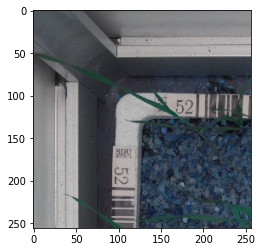

In [23]:
# Look at the image  after re-size

plt.imshow(images[50])

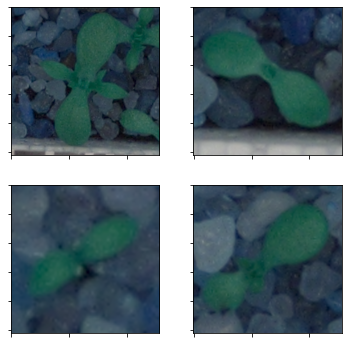

In [24]:
# Data Exploritation

def plot_for_class(label):
    nb_rows = 2
    nb_cols = 2
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))
    class_images =images[classes== label]
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(class_images[n])
            n += 1 
plot_for_class("Scentless Mayweed")

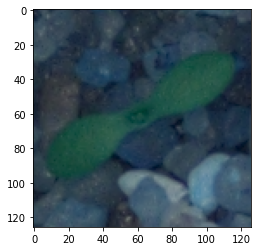

In [25]:
img = cv2.imread("./plant-seedlings-classification/train/Scentless Mayweed/1300c3cd9.png")

plt.imshow(img)

#  Image processing on the images
- convert image from RGB to HSV
-  Imageclosing opration(one of mophological opration)
- Image segmentation
- Image sharpening

In [26]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

In [27]:
# Put all those functions together

def segment(img):

  #image_mask = create_mask_for_plant(img)
  image_segmented = segment_plant(img)
  image_sharpen = sharpen_image(image_segmented)
  return image_sharpen

In [28]:
# Iterate on all images 

for indx, image in enumerate(images):
  try:
     images[indx] = segment(image)
      
  except:
    print(indx)
    continue
      

# Ploting a sample image to see difference before and after

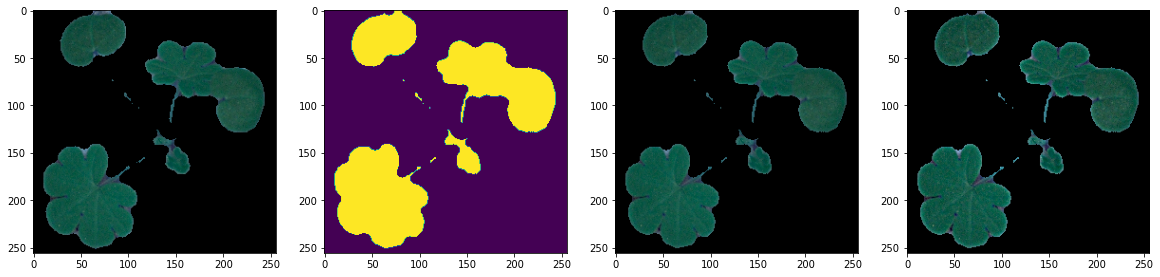

In [29]:
image = images[classes == "Small-flowered Cranesbill"][40]

image_mask = create_mask_for_plant(image)
image_segmented = segment_plant(image)
image_sharpen = sharpen_image(image_segmented)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(image_mask)
axs[2].imshow(image_segmented)
axs[3].imshow(image_sharpen)

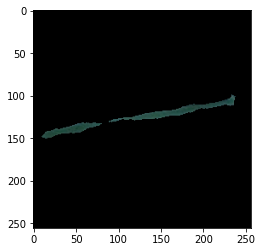

In [30]:
plt.imshow(images[0])

In [31]:
images.shape

(4750, 256, 256, 3)

In [32]:
X=images

In [33]:
X.shape

(4750, 256, 256, 3)

# Label Encoder

In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(classes)

In [50]:
y[0]

0

# Question 3. Model training [10 Marks]
#  Checkpoint: Please make sure if shape of X is (No.of images, height, width, No. Of channels). If not, you need to correct it otherwise it will be issue during model training.
#  A. Split the data into train and test data. [2 Marks]
#  B. Create new CNN architecture to train the model. [4 Marks]
#  C. Train the model on train data and validate on test data. [2 Marks]
#  D. Select a random image and print actual label and predicted label for the same. [2 Marks]

In [42]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

print('Training data shape : ', X_train.shape, y_train.shape)

print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (3325, 256, 256, 3) (3325, 12)
Testing data shape :  (1425, 256, 256, 3) (1425, 12)


# Create validarion set
- split test data into 50% test, 50% validation

In [43]:
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [44]:
print(X_test.shape)
print(X_val.shape)

(712, 256, 256, 3)
(713, 256, 256, 3)


# CNN MODEL

In [45]:
import tensorflow 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

In [46]:
# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,256, 256, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      36928     
                                                        

In [47]:


opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

C:\Users\sagar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\sagar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [51]:
# I put epochs = 10 and I waited until it reach a acceptable accuracy for me then I stopped the training at this point.
model.fit(X_train, y_train, epochs = 5, validation_data = (X_val,Y_val),batch_size = batch_size)

Epoch 1/5
104/104 [==============================] - 1855s 18s/step - loss: 1.5682 - accuracy: 0.4424 - val_loss: 1.5272 - val_accuracy: 0.5035
Epoch 2/5
104/104 [==============================] - 1965s 19s/step - loss: 1.4520 - accuracy: 0.4908 - val_loss: 1.4005 - val_accuracy: 0.5526
Epoch 3/5
104/104 [==============================] - 1250s 12s/step - loss: 1.3517 - accuracy: 0.5251 - val_loss: 1.1761 - val_accuracy: 0.6424
Epoch 4/5
104/104 [==============================] - 953s 9s/step - loss: 1.2772 - accuracy: 0.5507 - val_loss: 1.3221 - val_accuracy: 0.6073
Epoch 5/5
104/104 [==============================] - 963s 9s/step - loss: 1.1344 - accuracy: 0.6066 - val_loss: 1.0274 - val_accuracy: 0.6760


In [53]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0334004163742065
Test accuracy: 0.6629213690757751


In [54]:
X_test.shape

(712, 256, 256, 3)

In [55]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 5
batch_size = 2

# Data Augmentation

In [56]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [57]:
X_train, X_test, y_train, y_test
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = 2, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/2


C:\Users\sagar\AppData\Local\Temp\ipykernel_13860\328877492.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),


1662/1662 - 1088s - loss: 1.9246 - accuracy: 0.3855 - val_loss: 1.4073 - val_accuracy: 0.4965 - lr: 0.0010 - 1088s/epoch - 655ms/step
Epoch 2/2
1662/1662 - 1087s - loss: 1.7000 - accuracy: 0.4451 - val_loss: 1.8123 - val_accuracy: 0.4165 - lr: 0.0010 - 1087s/epoch - 654ms/step


In [58]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = None)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.8326587677001953
Test accuracy: 0.4185393154621124


# Model Evaluation

Loss Graph & Accuracy Graph


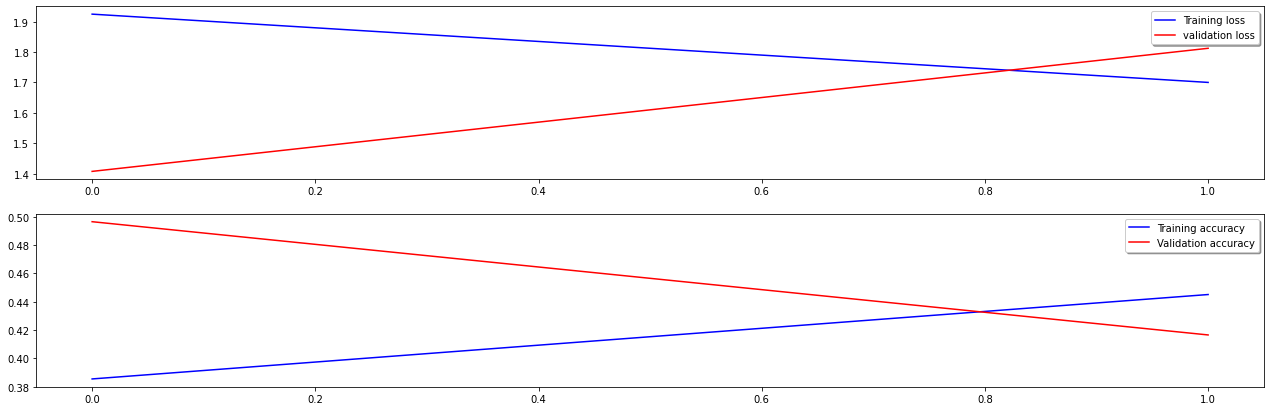

In [70]:
print("Loss Graph & Accuracy Graph")
fig, ax = plt.subplots(2,1 , figsize=(22,7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)



ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# Confusion Matrix

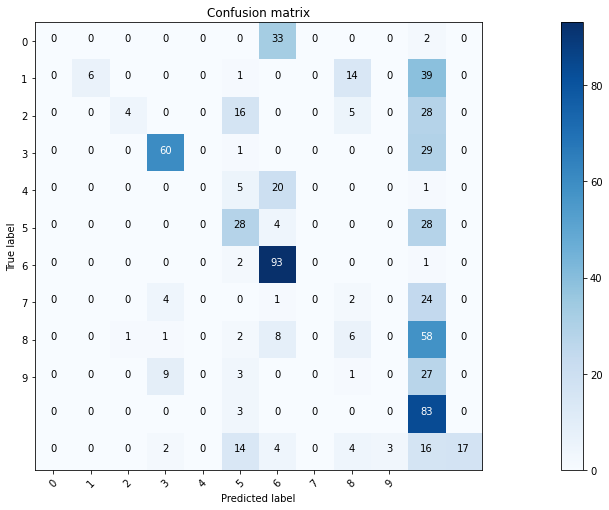

In [71]:
from sklearn.metrics import confusion_matrix
import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

# PART - B
# Question 1. Import and Understand the data [5 Marks]
#  A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading. [2 Marks]
#     Hint: It can be imported from tflearn.datasets. If tflearn is not installed, install it.
#     It can be loaded using: x, y = oxflower17.load_data()
#  B. Print Number of images and shape of the images. [1 Marks]
#  C. Print count of each class from y. [2 Marks]

In [76]:
import tflearn.datasets.oxflower17 as oxflower17
X, Y = oxflower17.load_data(one_hot=True)

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


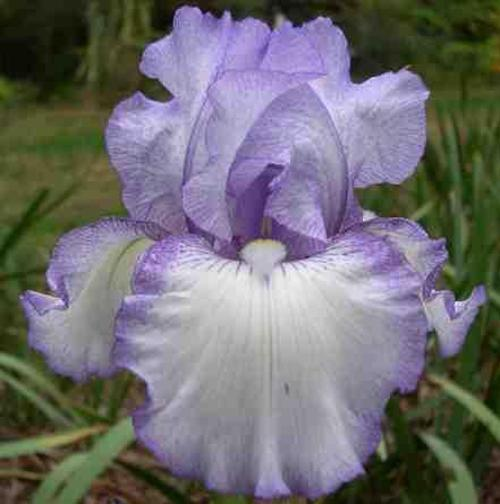

In [77]:
from PIL import Image #show one example of image
Image.open("./17flowers/jpg/5/image_0412.jpg")

In [78]:
# B. Print Number of images and shape of the images. [1 Marks]

X.shape

(1360, 224, 224, 3)

In [79]:
X.size

204718080

So there are 1360 images in oxflower17 dataset.

In [80]:
Y.shape

(1360, 17)

there are 1360 labels present in oxflower17 dataset.

In [123]:
# C. Print count of each class from y. [2 Marks]

# Finding the unique numbers from the train labels

print("Total number of classes : ") 
num_classes=Y.shape[1]
print("The number of classes in this dataset are:",num_classes)



Total number of classes : 
The number of classes in this dataset are: 17


# Question  2. Image Exploration & Transformation [Learning purpose - Not related to final model] [10 Marks]
#   A. Display 5 random images. [1 Marks]
#   B. Select any image from the dataset and assign it to a variable. [1 Marks]
#   C. Transform the image into grayscale format and display the same. [3 Marks]
#   D. Apply a filter to sharpen the image and display the image before and after sharpening. [2 Marks]
#   E. Apply a filter to blur the image and display the image before and after blur. [2 Marks]
#   F. Display all the 4 images from above questions besides each other to observe the difference. [1 Marks]

In [94]:
# Selecting 5 random images and print its name.

import random, os
path = r"./17flowers/jpg/1"

for x in range(5):
    random_filename = random.choice([
        y for y in os.listdir(path)
        if os.path.isfile(os.path.join(path, y))
    ])
    
    print(random_filename)
    


image_0156.jpg
image_0151.jpg
image_0106.jpg
image_0121.jpg
image_0156.jpg


In [100]:
# Question 2.A. Display 5 random images. [1 Marks]

multipleImages = glob('./17flowers/jpg/1/**')
def plotImages2():
    r = random.sample(multipleImages, 9)
    plt.figure(figsize=(20,20))
    plt.subplot(331)
    plt.imshow(cv2.imread(r[0])); plt.axis('off')
    plt.subplot(332)
    plt.imshow(cv2.imread(r[1])); plt.axis('off')
    plt.subplot(333)
    plt.imshow(cv2.imread(r[2])); plt.axis('off')
    plt.subplot(334)
    plt.imshow(cv2.imread(r[3])); plt.axis('off')
    plt.subplot(335)
    plt.imshow(cv2.imread(r[4])); plt.axis('off')


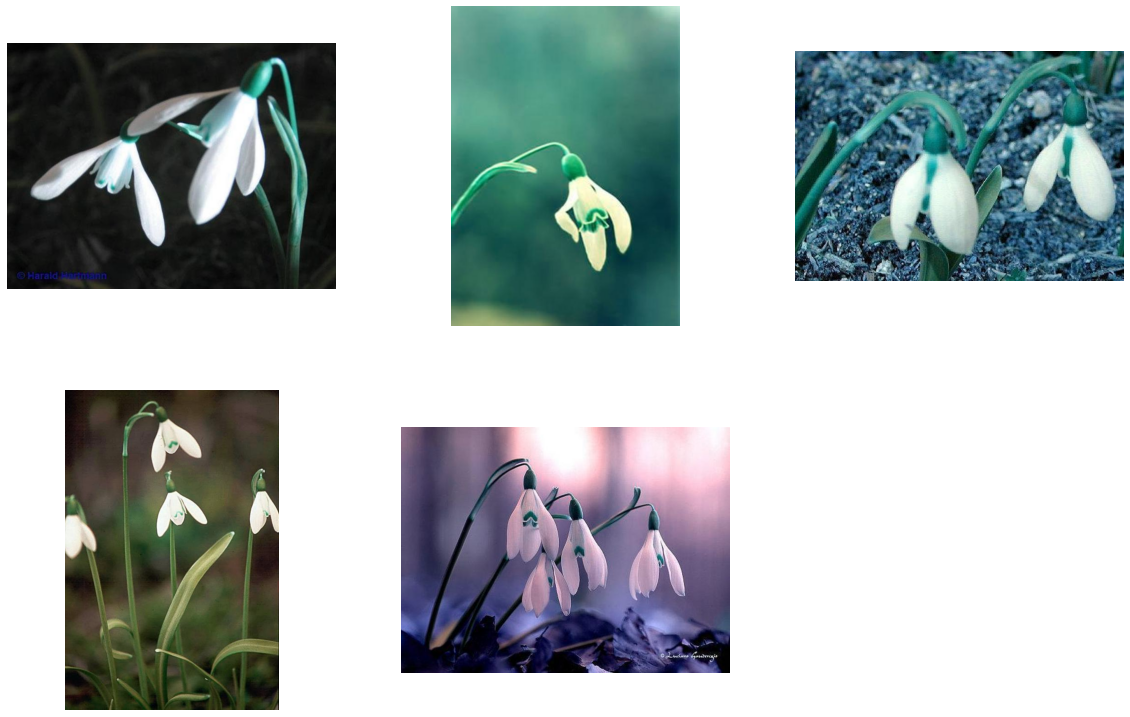

In [99]:
plotImages2()

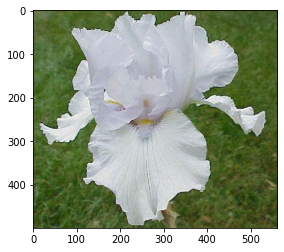

In [83]:
# B. Select any image from the dataset and assign it to a variable. [1 Marks]


from PIL import Image

original_img = Image.open("./17flowers/jpg/5/image_0425.jpg") 
plt.imshow(original_img)
plt.show()


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


image_0425 after grayscale


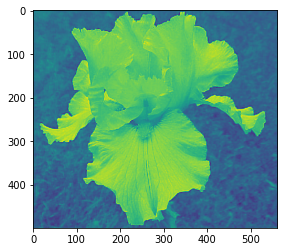

In [84]:
# C. Transform the image into grayscale format and display the same. [3 Marks]

from skimage import color
from skimage import io

#img = io.imread('./17flowers/jpg/2/image_0162.jpg')

read_image = io.imread('./17flowers/jpg/5/image_0425.jpg')

img = color.rgb2gray(read_image)
io.imsave("Image-greyscale.png",img)

print("image_0425 after grayscale")
plt.imshow(img)
plt.show()


Image before sharpening


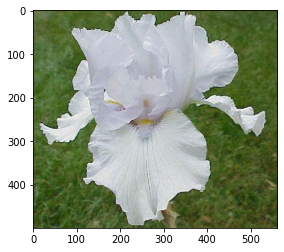

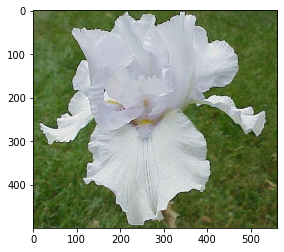

In [85]:

from PIL import Image, ImageEnhance

# Open an already existing image
imageObject = Image.open("./17flowers/jpg/5/image_0425.jpg");
print("Image before sharpening")
plt.imshow(imageObject)
plt.show()


enhancer = ImageEnhance.Sharpness(imageObject)

factor = 2
sharper_img = enhancer.enhance(factor)
plt.imshow(sharper_img)
plt.show()


Original Image : 


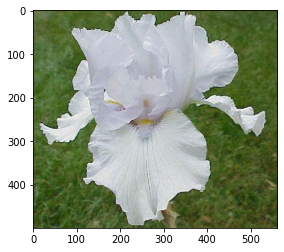

Blur Image : 


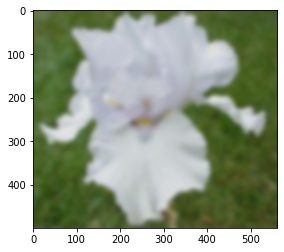

In [86]:
# E. Apply a filter to blur the image and display the image before and after blur. [2 Marks]


#Import required Image library
from PIL import Image, ImageFilter

#Open existing image
OriImage = Image.open('./17flowers/jpg/5/image_0425.jpg')
print("Original Image : ")
plt.imshow(OriImage)
plt.show()


blurImage1 = OriImage.filter(ImageFilter.GaussianBlur(5))
print("Blur Image : ")
plt.imshow(blurImage1)
plt.show()

#Save blurImage
blurImage1.save('./simBlurImage1.jpg')


Now I am bluring it more

Original Image : 


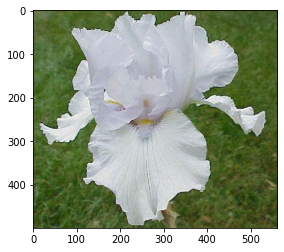

Blur Image : 


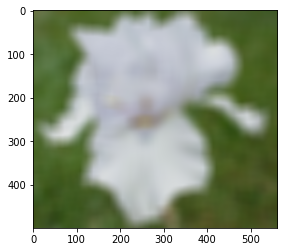

In [87]:
#Open existing image
OriImage = Image.open('./17flowers/jpg/5/image_0425.jpg')
print("Original Image : ")
plt.imshow(OriImage)
plt.show()


blurImage2 = OriImage.filter(ImageFilter.BoxBlur(15))
print("Blur Image : ")
plt.imshow(blurImage2)
plt.show()

#Save blurImage
blurImage2.save('./simBlurImage2.jpg')


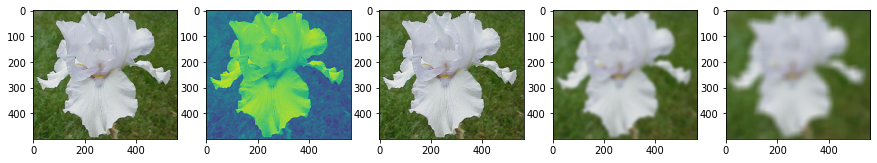

In [88]:
# F. Display all the 4 images from above questions besides each other to observe the difference. [1 Marks]


fig, axs = plt.subplots(1, 5, figsize=(15, 15))
axs[0].imshow(original_img)
axs[1].imshow(img)
axs[2].imshow(sharper_img)
axs[3].imshow(blurImage1)
axs[4].imshow(blurImage2)

From above all 5 images 1st Image is original Image , 2nd one is grayscale Image, 3rd one is sharpen image and 4th and 5th are blured Image. As we put all images together we can easily understand difference between them.

# Question 3. Model training and Tuning: [15 Marks]
#   A. Split the data into train and test with 80:20 proportion. [2 Marks]
#   B. Train a model using any Supervised Learning algorithm and share performance metrics on test data. [3 Marks]
#   C. Train a model using Neural Network and share performance metrics on test data. [4 Marks]
#   D. Train a model using a basic CNN and share performance metrics on test data. [4 Marks]
#   E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label. [2 Marks]

In [117]:
# A. Split the data into train and test with 80:20 proportion. [2 Marks]

from sklearn.model_selection import train_test_split

#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state = 1)


print('Training data shape : ', X_train.shape, y_train.shape)

print('Testing data shape : ', X_test.shape, y_test.shape)


random_seed = 2
X_test, X_val, Y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

Training data shape :  (1088, 224, 224, 3) (1088, 17)
Testing data shape :  (272, 224, 224, 3) (272, 17)


In [125]:
#   B. Train a model using any Supervised Learning algorithm and share performance metrics on test data. [3 Marks]

from sklearn.linear_model import LogisticRegression


logisticReg = LogisticRegression(solver="liblinear")

logisticReg.fit(X_train, y_train)
y_pred = logisticReg.predict(X_test)

#Checking performance our model with classification report.

print(classification_report(y_test, y_pred))

ValueError: Found array with dim 4. Estimator expected <= 2.

#  Q3.c Neural Network Using Keras

In [126]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

# Define the network model and its arguments. 
# Set the number of neurons/nodes for each layer:
model = Sequential()
model.add(Dense(2, input_shape=(2,)))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid')) 

# Compile the model and calculate its accuracy:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy']) 

# Print a summary of the Keras model:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 6         
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
 dense_13 (Dense)            (None, 1)                 3         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [127]:
# Fit the model

history = model.fit(X_train, y_train, validation_data=(X_val, Y_val), epochs=5, batch_size=2, verbose=2)

ValueError: Error when checking input: expected dense_12_input to have 2 dimensions, but got array with shape (1088, 224, 224, 3)

# CNN Model

In [119]:
# define model
# Q3.D. Train a model using a basic CNN and share performance metrics on test data. [4 Marks]

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def nn_model():
    # create model
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [120]:

# build the model
model = nn_model()

In [121]:
# Compile model
sgd = optimizers.Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) ### Loss function = Categorical cross entropy

C:\Users\sagar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [130]:
# Fit the model
training_history = model.fit(X_train, y_train, validation_data=(X_val, Y_val), epochs=5, batch_size=2, verbose=2)

ValueError: Error when checking input: expected dense_12_input to have 2 dimensions, but got array with shape (1088, 224, 224, 3)

In [124]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

ValueError: Input arrays should have the same number of samples as target arrays. Found 136 input samples and 272 target samples.

In [132]:
# Q 3.E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label. [2 Marks]


In [133]:
ypred = model.predict(X_test)

ValueError: Error when checking input: expected dense_12_input to have 2 dimensions, but got array with shape (136, 224, 224, 3)